In [118]:
import yfinance as yf
import matplotlib.pyplot as plt 
from datetime import datetime
import pandas as pd
import numpy as np

In [4]:
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [5]:
start

datetime.datetime(2004, 9, 15, 0, 0)

In [7]:
stock = "AAPL"
apple_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [15]:
apple_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-09-15 to 2024-09-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [16]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,49.748053,50.280264,49.236466,49.780269,48.060576,3.957891e+08
std,59.555674,60.195656,58.957855,59.605574,59.560478,3.995769e+08
min,0.628571,0.633571,0.621429,0.628571,0.530813,2.404830e+07
25%,6.758750,6.806696,6.641786,6.751071,5.701112,1.038754e+08
50%,24.039643,24.222500,23.812500,24.060000,21.595830,2.453420e+08
75%,56.136874,56.608750,55.293125,55.985001,53.732248,5.706631e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.372970e+09


In [17]:
apple_data.shape

(5034, 6)

In [18]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-15,0.631429,0.633571,0.621429,0.628571,0.530813,232668800
2004-09-16,0.628571,0.656429,0.626429,0.649107,0.548155,501916800
2004-09-17,0.652679,0.667500,0.650000,0.663214,0.560068,502308800
2004-09-20,0.658571,0.678214,0.658393,0.673393,0.568664,245000000
2004-09-21,0.674107,0.694107,0.668929,0.678750,0.573187,386652000


In [20]:
apple_data.isna().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing price of Apple stock')

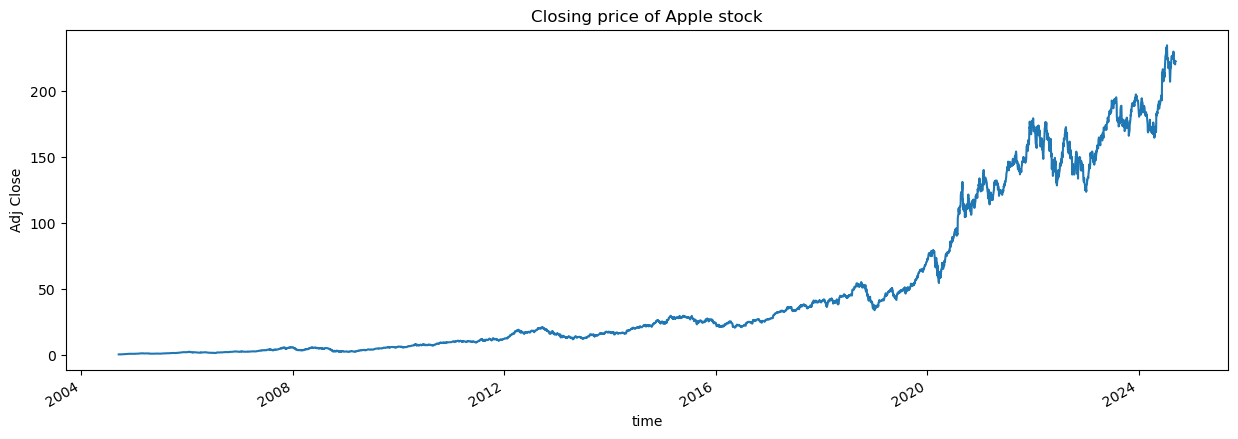

In [21]:
plt.figure(figsize = (15,5))
apple_data['Adj Close'].plot()
plt.xlabel("time")
plt.ylabel("Adj Close")
plt.title("Closing price of Apple stock")

In [22]:
def graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Apple data")

In [24]:
apple_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

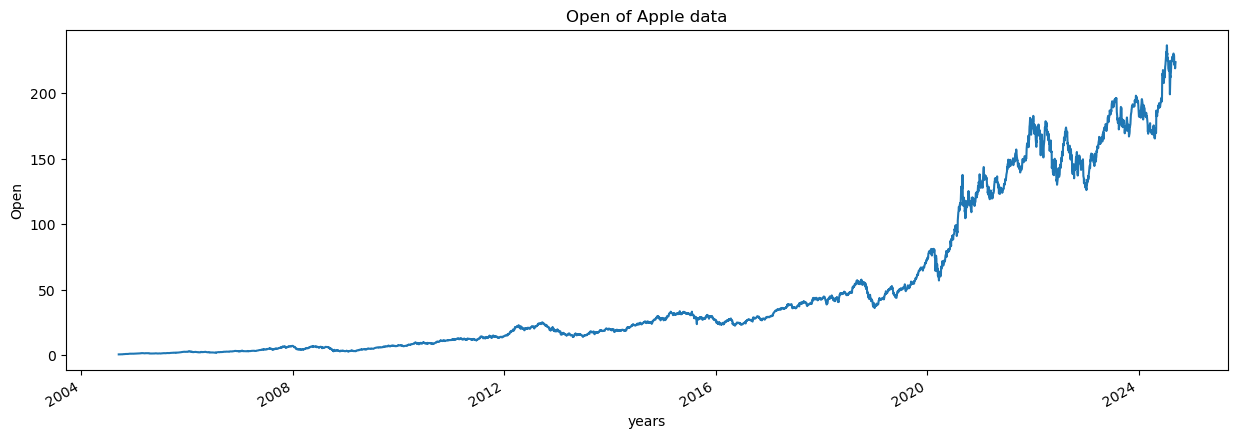

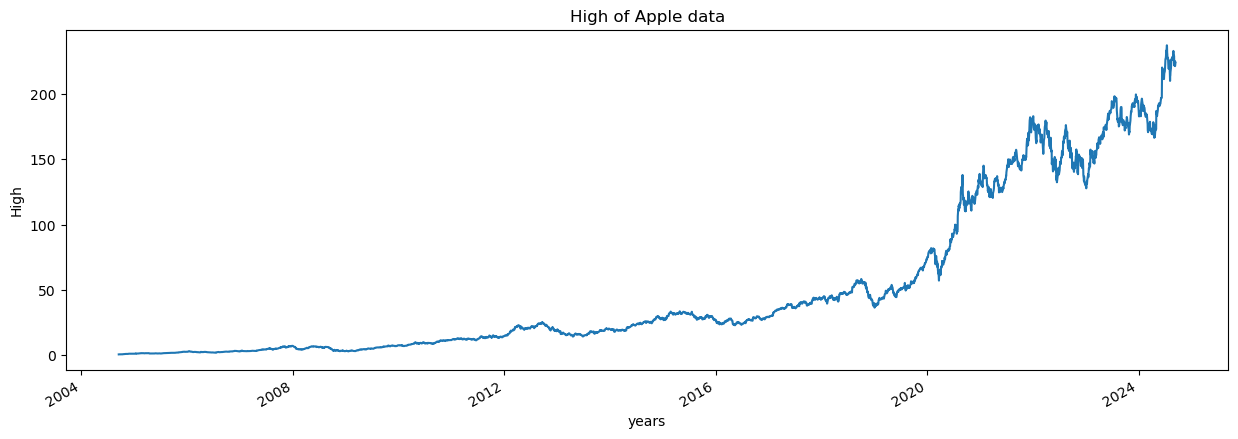

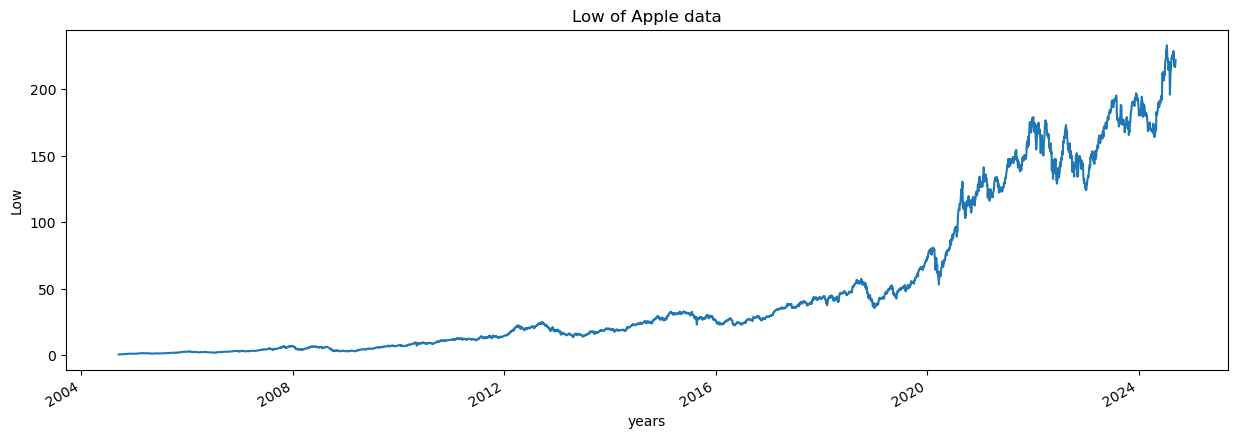

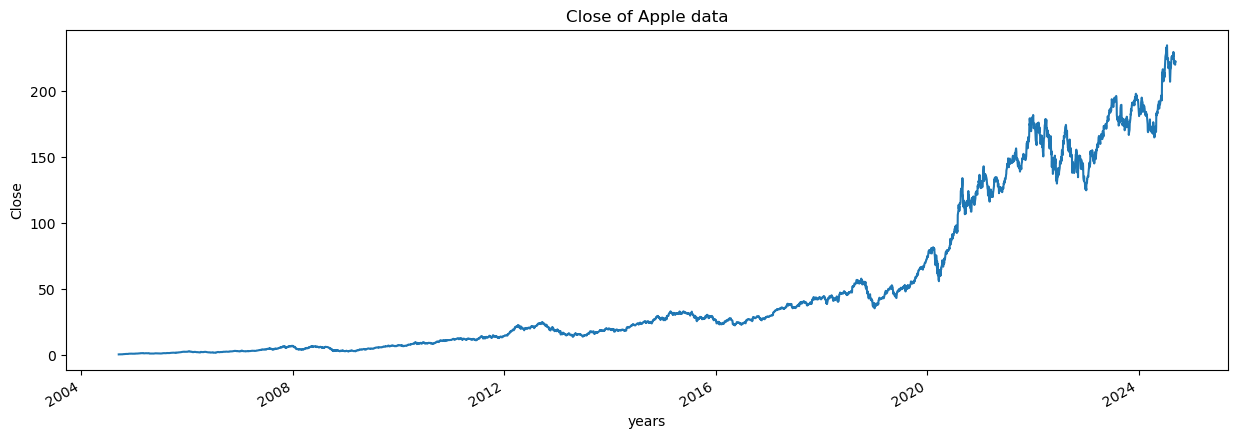

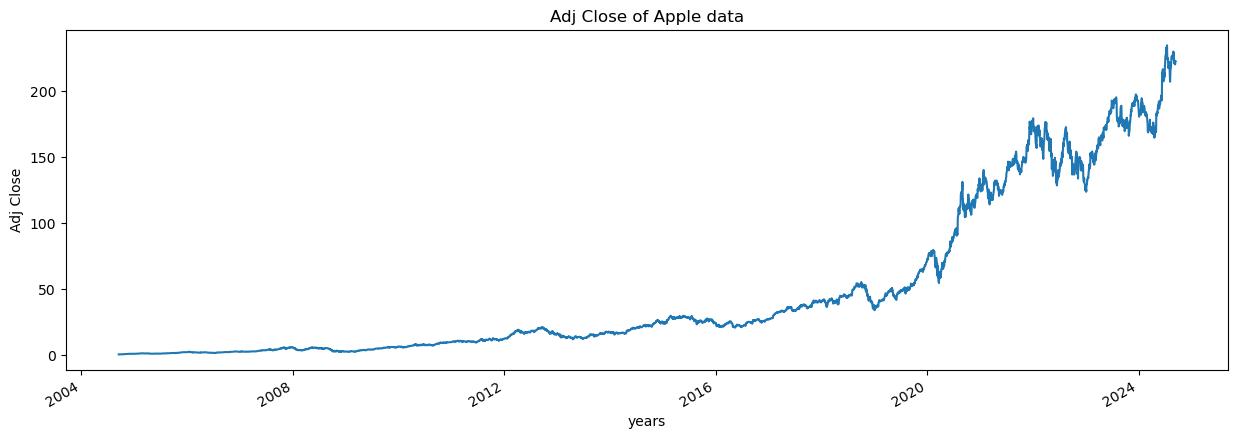

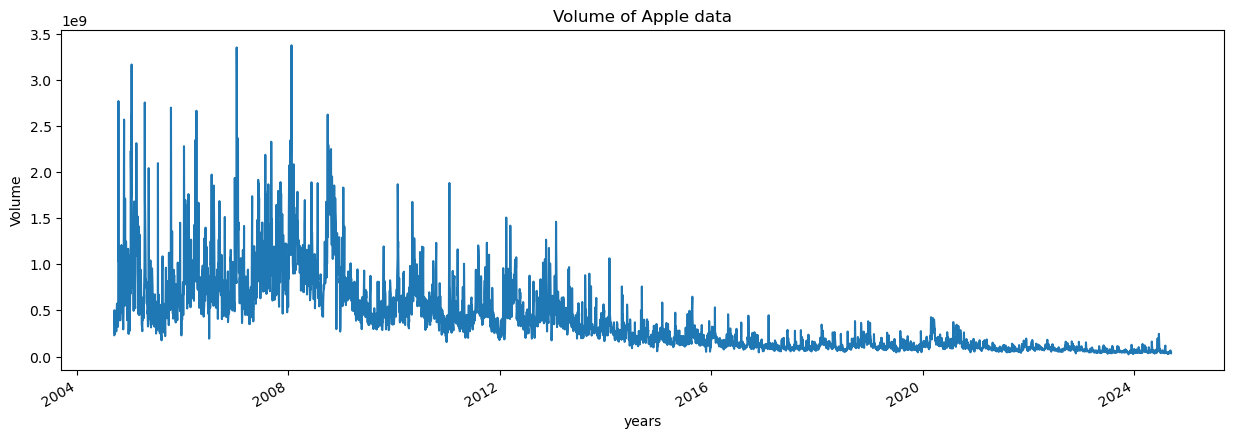

In [25]:
for columns in apple_data.columns : 
    graph((15,5),apple_data[columns],columns)

# Introducing the concept of moving average




In [50]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data['MA'] = data.rolling(5).mean() # a simple way to calculate the moving average over 5 periods


In [51]:
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [60]:
for i in range(2004,2025):
    print(i,list(apple_data.index.year).count(i))

#there is only 250 trading days in a year

2004 76
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 177


In [65]:
apple_data

,Open,High,Low,Close,Adj Close,Volume,MA for 250 days
Date,,,,,,,
2005-09-02,1.653571,1.671429,1.647143,1.650714,1.393987,222378800,NaN
2005-09-06,1.667857,1.745714,1.662500,1.742857,1.471800,818619200,NaN
2005-09-07,1.751786,1.764286,1.711429,1.738571,1.468180,963074000,NaN
2005-09-08,1.762500,1.790000,1.755000,1.777857,1.501356,702640400,NaN
2005-09-09,1.788214,1.833929,1.778214,1.832500,1.547501,615641600,1.083909


In [75]:
rolling_days = 250
apple_data[f'MA_for_{rolling_days}_days'] = apple_data['Adj Close'].rolling(rolling_days).mean()

In [76]:
apple_data[0:250].tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 250 days,MA_for_250_days
Date,,,,,,,,
2005-09-02,1.653571,1.671429,1.647143,1.650714,1.393987,222378800,NaN,NaN
2005-09-06,1.667857,1.745714,1.662500,1.742857,1.471800,818619200,NaN,NaN
2005-09-07,1.751786,1.764286,1.711429,1.738571,1.468180,963074000,NaN,NaN
2005-09-08,1.762500,1.790000,1.755000,1.777857,1.501356,702640400,NaN,NaN
2005-09-09,1.788214,1.833929,1.778214,1.832500,1.547501,615641600,1.083909,1.083909


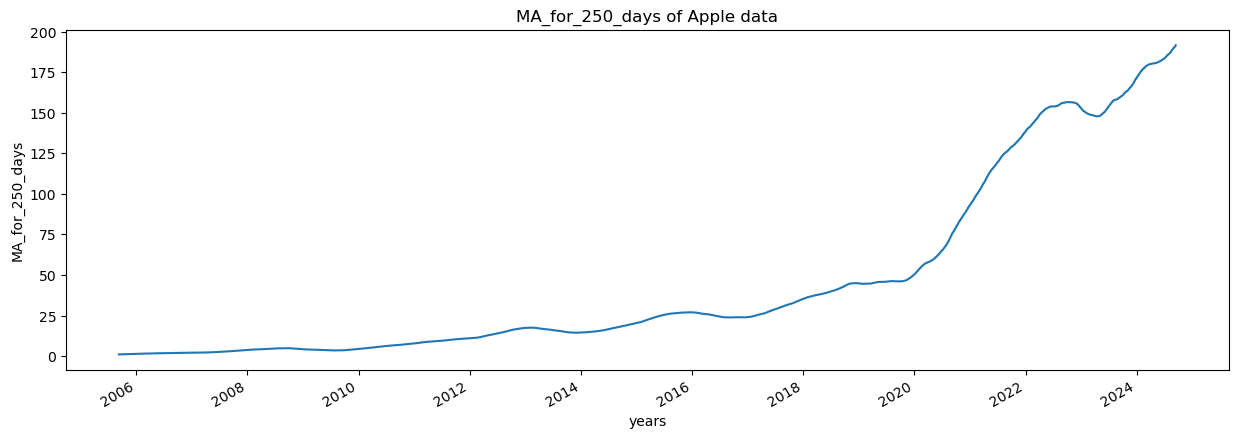

In [77]:
graph((15,5), apple_data[f'MA_for_{rolling_days}_days'], f'MA_for_{rolling_days}_days')

<Figure size 640x480 with 0 Axes>

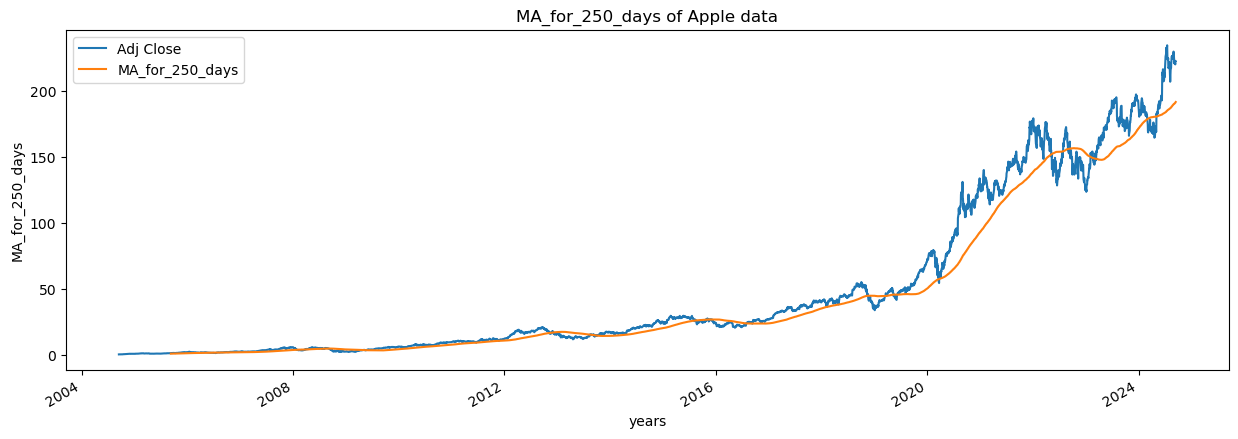

In [80]:
graph((15,5), apple_data[['Adj Close', f'MA_for_{rolling_days}_days']], f'MA_for_{rolling_days}_days')

In [90]:
# with less days
rolling_days = 100
apple_data[f'MA_for_{rolling_days}_days'] = apple_data['Adj Close'].rolling(rolling_days).mean()

<Figure size 640x480 with 0 Axes>

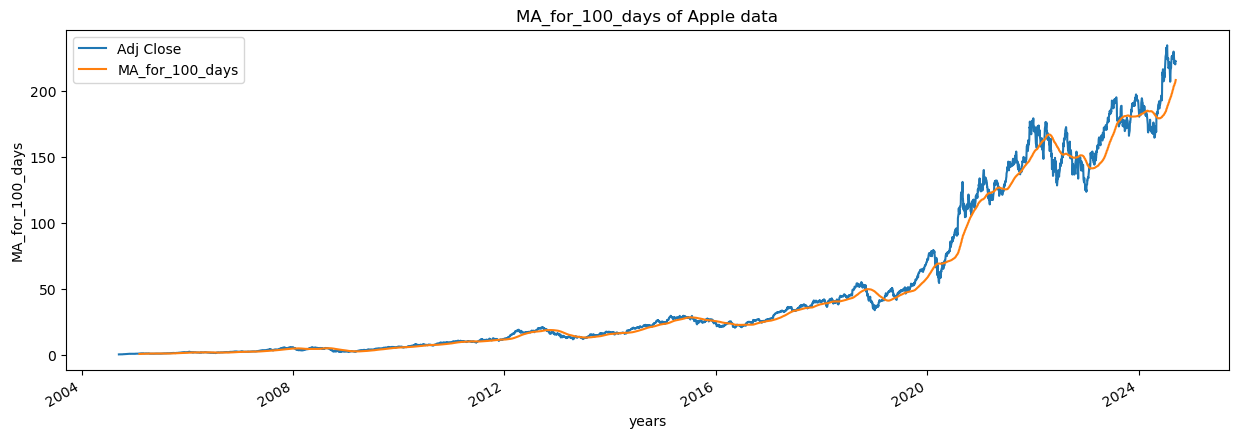

In [91]:
graph((15,5), apple_data[['Adj Close', f'MA_for_{rolling_days}_days']], f'MA_for_{rolling_days}_days')

In [92]:
#having a bit of forecasting is great

<Figure size 640x480 with 0 Axes>

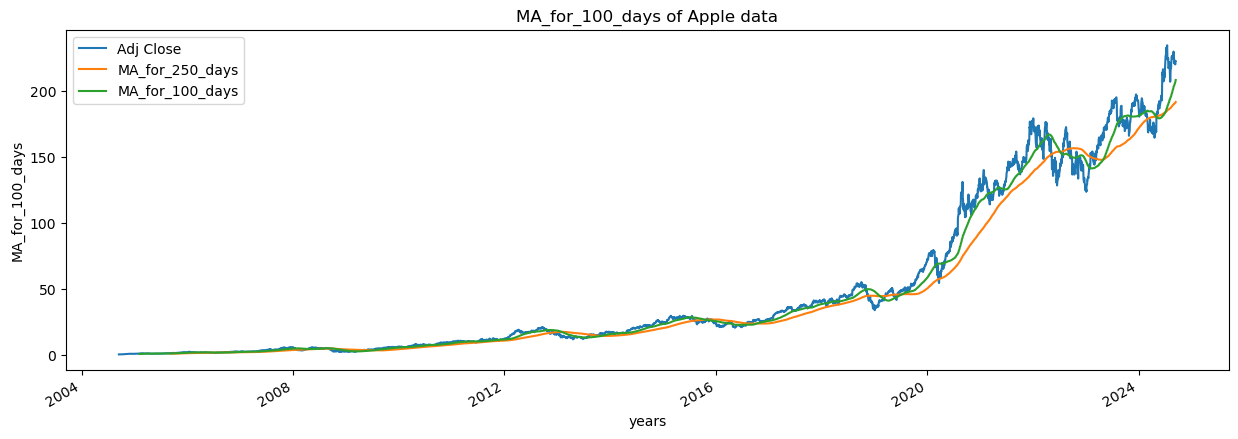

In [94]:
graph((15,5), apple_data[['Adj Close', 'MA_for_250_days', f'MA_for_{rolling_days}_days']], f'MA_for_{rolling_days}_days')

In [103]:
apple_data['percentage_change_cp'] = apple_data['Adj Close'].pct_change()
apple_data[['Adj Close','percentage_change__cp']].tail()

,Adj Close,percentage_change__cp
Date,,
2024-09-09,220.910004,0.000408
2024-09-10,220.110001,-0.003621
2024-09-11,222.660004,0.011585
2024-09-12,222.770004,0.000494
2024-09-13,222.500000,-0.001212


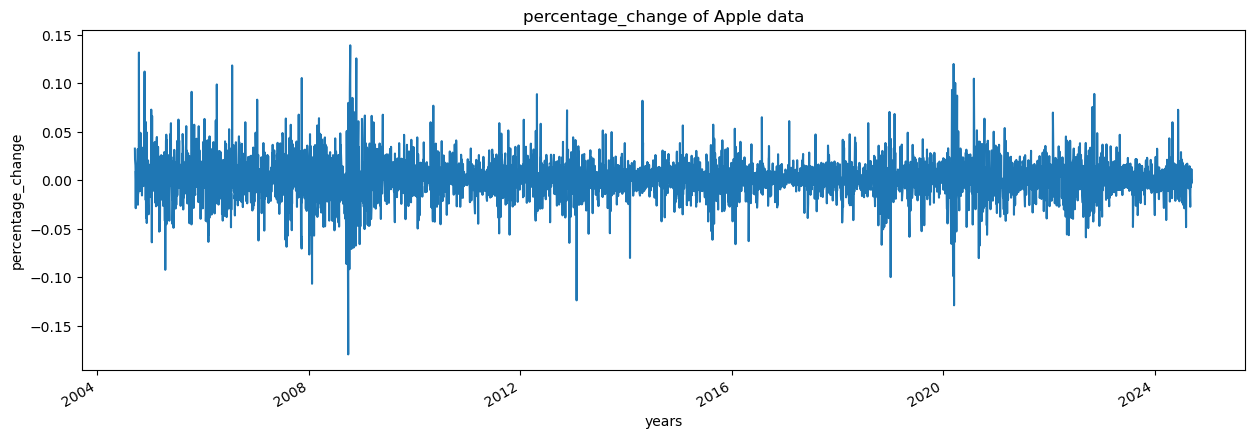

In [105]:
graph((15,5), apple_data['percentage_change_cp'], 'percentage_change')

In [108]:
Adj_close_price = apple_data[['Adj Close']]

In [114]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([234.54852295]), array([0.53081274]))

In [124]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data


array([[0.00000000e+00],
       [7.41058896e-05],
       [1.25011536e-04],
       ...,
       [9.49198207e-01],
       [9.49668259e-01],
       [9.48514482e-01]])

In [116]:
len(scaled_data)

5034

In [119]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
x_data, y_data = np.array(x_data), np.array(y_data)

# x_data[i] is an array of the 100 values before y_data[i]
# the purpose is to forecast the 101th value with the previous 100 values 

In [121]:
x_data[0].shape ,y_data[0]

((100, 1), array([0.00281857]))

In [125]:
# splitting the data
splitting_len = int(len(x_data)*0.7)

x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [126]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1))) 
#first layer that returns a complete sequence of outputs so that the next layer can recieve the entire sequence and can treat each temporal step

model.add(LSTM(64,return_sequences=False)) 
# take the whole sequence of the first layer and return only the last output (oftenly used before dense layer that requires a 
# condensed representation of the sequence)
model.add(Dense(25))
# a fully conected layer --> non linear transformation
model.add(Dense(1))
# I one to predict only one value at the end 

NameError: name 'Sequential' is not defined

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

In [ ]:
model.summary()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions